#Mateus Natan Roes Salgueiro
#Paulo Elias Tavares Generozo
#Rafael Augusto Moraes Monteiro
#Thomas Jefferson Batista Américo

#PLN - 5 CD FATEC OURINHOS

In [ ]:
# Tem que dar pip install pra funcionar
!pip install wordcloud matplotlib

In [ ]:
!pip install spacy

In [ ]:
# Tem que dar pip install pra funcionar
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 22.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


#ALBERTO CAEIRO

# Preparação do Corpus e Pré-Processamento
* Atividade:

    * Carregar o corpus de poesias de Alberto Caeiro.
    * Realizar tokenização de sentenças e palavras.
    * Remover stopwords e pontuação para facilitar a análise.
    * Criar uma nuvem de palavras (WordCloud) para visualizar termos mais frequentes.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


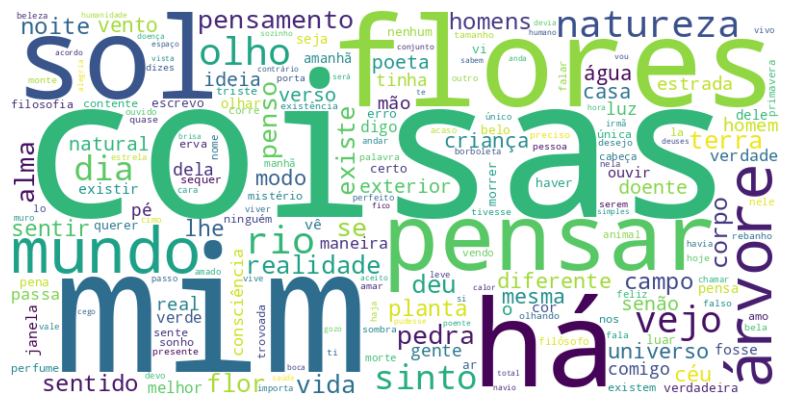

In [ ]:
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Carregar o modelo de português do spaCy
nlp_alberto = spacy.load("pt_core_news_sm")

# Caminho para o arquivo CSV
corpus_path_alberto = "/content/drive/My Drive/trabalho_PLN/textos/autores/alberto_caeiro.csv"

# Carregar o arquivo CSV com pandas
df_alberto = pd.read_csv(corpus_path_alberto)

# Concatena coluna Texto
corpus_alberto = " ".join(df_alberto["Texto"].dropna())

# Processar o texto
doc_alberto = nlp_alberto(corpus_alberto)

# Filtrar palavras sem stopwords e pontuação
tokens_filtrados_alberto = [token.text.lower() for token in doc_alberto if not token.is_stop and not token.is_punct]

# Criar a nuvem de palavras
wordcloud_alberto = WordCloud(width=800, height=400, background_color="white").generate(" ".join(tokens_filtrados_alberto))

# Mostrar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_alberto, interpolation="bilinear")
plt.axis("off")
plt.show()

# Análise Estatística de Vocabulário
* Atividade:
    * Contar frequência de palavras e identificar os termos mais recorrentes.
    * Comparar o uso de substantivos, verbos e adjetivos na obra.
    * Criar um gráfico de distribuição de palavras.

<ipython-input-7-84168b5984f8>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Frequência", y="Palavra", data=df_frequencia_alberto, palette="Blues_r")


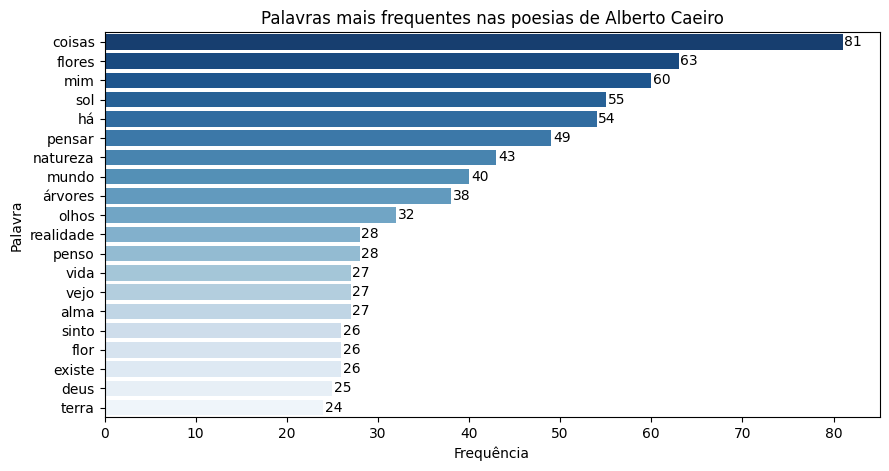

In [ ]:
from collections import Counter
import seaborn as sns

# Remover tokens inválidos (para evitar barras em branco)
tokens_filtrados_alberto = [token for token in tokens_filtrados_alberto if token.strip()]

# Contagem de palavras
frequencia = Counter(tokens_filtrados_alberto)

# Cria dataframe para visualização
df_frequencia_alberto = pd.DataFrame(frequencia.items(), columns=["Palavra", "Frequência"]).sort_values(by="Frequência", ascending=False).head(20)

# Plota gráfico de barras
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Frequência", y="Palavra", data=df_frequencia_alberto, palette="Blues_r")
plt.xlabel("Frequência")
plt.ylabel("Palavra")
plt.title("Palavras mais frequentes nas poesias de Alberto Caeiro")

# Adiciona a quantidade de palavras na frente das barras (curiosidade)
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width() + 0.2, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black')

plt.show()

# Análise Sintática e Estilística
* Atividade:
    * Aplicar POS-Tagging (Etiquetagem Gramatical).
    * Comparar a estrutura gramatical das poesias.
    * Criar um histograma da frequência de diferentes classes gramaticais.

<ipython-input-8-cd709c415c0c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequência", y="POS", data=df_pos_alberto, palette="Purples_r")


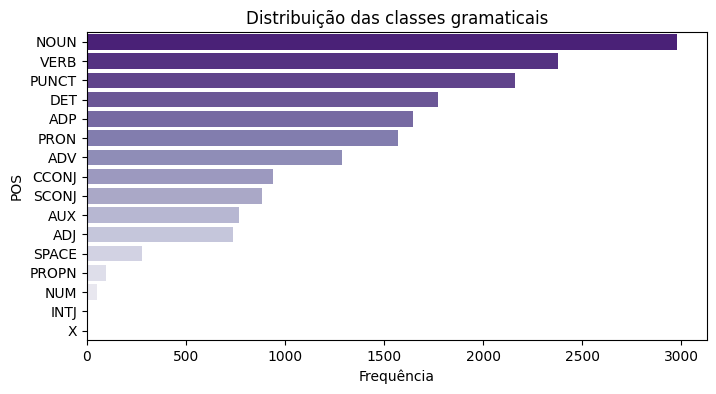

In [ ]:
# Contagem de classes gramaticais
pos_tags_alberto = [token.pos_ for token in doc_alberto]
contagem_pos_alberto = Counter(pos_tags_alberto)

# Criar DataFrame para visualização
df_pos_alberto = pd.DataFrame(contagem_pos_alberto.items(), columns=["POS", "Frequência"]).sort_values(by="Frequência", ascending=False)

# Plotar gráfico de barras
plt.figure(figsize=(8,4))
sns.barplot(x="Frequência", y="POS", data=df_pos_alberto, palette="Purples_r")
plt.xlabel("Frequência")
plt.ylabel("POS")
plt.title("Distribuição das classes gramaticais")
plt.show()

# Modelagem de Estilo e Semântica
* Atividade:
    * Calcular a riqueza lexical das poesias.
    * Aplicar TF-IDF para destacar palavras mais importantes.
    * Criar embeddings de palavras para comparação semântica.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Concatenar tokens filtrados em uma única string
texto_filtrado_alberto = " ".join(tokens_filtrados_alberto)

# Criar um vetor TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([texto_filtrado_alberto])

# Mostrar palavras mais importantes (com os scores TF-IDF)
print(pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()))

      abafa    abaixo  abanavam  abandona    aberta      abre     abria  \
0  0.003642  0.014569  0.003642  0.003642  0.003642  0.014569  0.003642   

      abrir   abrisse  absolutamente  ...   árvores   êxtases    íntima  \
0  0.003642  0.003642       0.014569  ...  0.138405  0.007284  0.003642   

     íntimo      íris      ódio   órbitas    última     única     único  
0  0.018211  0.003642  0.003642  0.003642  0.003642  0.036422  0.025496  

[1 rows x 2169 columns]


In [ ]:
# Criar um vetor TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([texto_filtrado_alberto])

# Criar o DataFrame com as palavras e seus valores TF-IDF
df_tfidf_alberto = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Ordenar os valores de TF-IDF
df_alberto_head = df_tfidf_alberto.T.sort_values(by=0, ascending=False).head(10)
df_alberto_tail = df_tfidf_alberto.T.sort_values(by=0, ascending=False).tail(10)

# Exibir as 10 palavras mais importantes
print(df_alberto_head)
print()
print(df_alberto_tail)

                 0
me        0.298664
coisas    0.295022
flores    0.229461
mim       0.222177
sol       0.203966
há        0.200323
pensar    0.178470
natureza  0.156616
mundo     0.145690
árvores   0.138405

                     0
meu           0.003642
metáforas     0.003642
meto          0.003642
cristianismo  0.003642
cruzados      0.003642
crê           0.003642
cujas         0.003642
culto         0.003642
merece        0.003642
abafa         0.003642


In [ ]:
# Usando NLTK e removendo stopwords
import nltk

# Baixar o conjunto de stopwords do NLTK
nltk.download('stopwords')

from nltk.corpus import stopwords

# Obter as stopwords em português do NLTK
stopwords_pt_nltk = stopwords.words('portuguese')

# Criar um vetor TF-IDF para o corpus filtrado, removendo stopwords em português
vectorizer = TfidfVectorizer(stop_words=stopwords_pt_nltk)
X = vectorizer.fit_transform(df_alberto['Texto'])

# Obter o array de TF-IDF
tfidf_array = X.toarray()

# Criar um dataframe com os valores de TF-IDF, usando as palavras como colunas
tfidf_df = pd.DataFrame(tfidf_array, columns=vectorizer.get_feature_names_out())

# Calcular a média de TF-IDF por palavra
mean_tfidf = tfidf_df.mean(axis=0)

# Ordena as palavras com base no valor médio de TF-IDF (da maior para a menor relevância)
sorted_mean_tfidf = mean_tfidf.sort_values(ascending=False)

# Mostrar as palavras mais relevantes e menos relevantes (de acordo com valor TF-IDF)
print(sorted_mean_tfidf.head(10))
print()
print(sorted_mean_tfidf.tail(10))

porque      0.039822
coisas      0.034790
coisa       0.034334
flores      0.030522
sol         0.028221
mim         0.026616
ver         0.025971
ter         0.025677
sei         0.025531
natureza    0.024675
dtype: float64

glória       0.00032
gosta        0.00032
gostam       0.00032
roubou       0.00032
rouba        0.00032
cantores     0.00032
gozando      0.00032
cantassem    0.00032
cantando     0.00032
cama         0.00032
dtype: float64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Comparação com Fernando Pessoa
* Atividade:
    * Comparar a escrita de Alberto Caeiro com a Fernando Pessoa.
    * Gerar um modelo de similaridade textual para encontrar diferenças estilísticas.
    * Criar um classificador para tentar identificar quem escreveu um poema com base nas características do texto.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Carregar .csv
corpus_path_alberto = "/content/drive/My Drive/trabalho_PLN/textos/autores/alberto_caeiro.csv"
corpus_path_fernando = "/content/drive/My Drive/trabalho_PLN/textos/autores/fernando_pessoa.csv"

# Carregar os textos
with open(corpus_path_alberto, 'r', encoding='utf-8') as file:
    alberto_text = file.read()

with open(corpus_path_fernando, 'r', encoding='utf-8') as file:
    fernando_text = file.read()

# Criar o vetor de características com TfidfVectorizer
vectorizer = TfidfVectorizer()

# Ajustar o vetor de características com ambos os textos
X = vectorizer.fit_transform([alberto_text, fernando_text])

# Comparar semelhança entre Alberto Caeiro e Fernando Pessoa
sim = cosine_similarity(X[0], X[1])
print(f"Similaridade entre Alberto Caeiro e Fernando Pessoa: {sim[0][0]:.2f}")

Similaridade entre Alberto Caeiro e Fernando Pessoa: 0.82


In [ ]:
# Como o cosseno de similaridade funciona? EXEMPLO:

# Pode dar diferente em relação do que fazer no papel, pois CountVectorizer pode remover palavras comuns como "o", "de"
# Portanto, nesse caso ele cria vetores assim:
# vetor 1 [1, 0, 1, 1, 1, 1,]
# vetor 2 [0, 1, 1, 1, 1, 1]

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

A = ["Corinthians é o melhor time de futebol"]
B = ["Flamengo é o melhor time de futebol"]

# Converter textos para vetores numéricos
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(A + B)

# Calcula a similaridade do cosseno entre os vetores
cos_sim = cosine_similarity(X[0], X[1])[0][0]

print(f"Similaridade do cosseno: {cos_sim:.2f}")

Similaridade do cosseno: 0.80


#RICARDO REIS

# Preparação do Corpus e Pré-Processamento
* Atividade:

    * Carregar o corpus de poesias de Ricardo Reis.
    * Realizar tokenização de sentenças e palavras.
    * Remover stopwords e pontuação para facilitar a análise.
    * Criar uma nuvem de palavras (WordCloud) para visualizar termos mais frequentes.

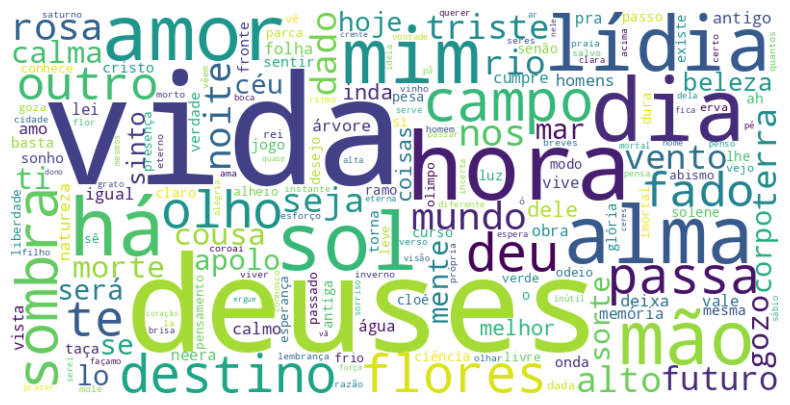

In [ ]:
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Carregar o modelo de português do spaCy
nlp_ricardo = spacy.load("pt_core_news_sm")

# Caminho para o arquivo CSV
corpus_path_ricardo = "/content/drive/My Drive/trabalho_PLN/textos/autores/ricardo_reis.csv"

# Carregar o arquivo CSV com pandas
df_ricardo = pd.read_csv(corpus_path_ricardo)

# Concatena coluna Texto
corpus_ricardo = " ".join(df_ricardo["Texto"].dropna())

# Processar o texto
doc_ricardo = nlp_ricardo(corpus_ricardo)

# Filtrar palavras sem stopwords e pontuação
tokens_filtrados_ricardo = [token.text.lower() for token in doc_ricardo if not token.is_stop and not token.is_punct]

# Criar a nuvem de palavras
wordcloud_ricardo = WordCloud(width=800, height=400, background_color="white").generate(" ".join(tokens_filtrados_ricardo))

# Mostrar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ricardo, interpolation="bilinear")
plt.axis("off")
plt.show()

# Análise Estatística de Vocabulário
* Atividade:
    * Contar frequência de palavras e identificar os termos mais recorrentes.
    * Comparar o uso de substantivos, verbos e adjetivos na obra.
    * Criar um gráfico de distribuição de palavras.

<ipython-input-16-610e3fd7bb23>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Frequência", y="Palavra", data=df_frequencia_ricardo, palette="Blues_r")


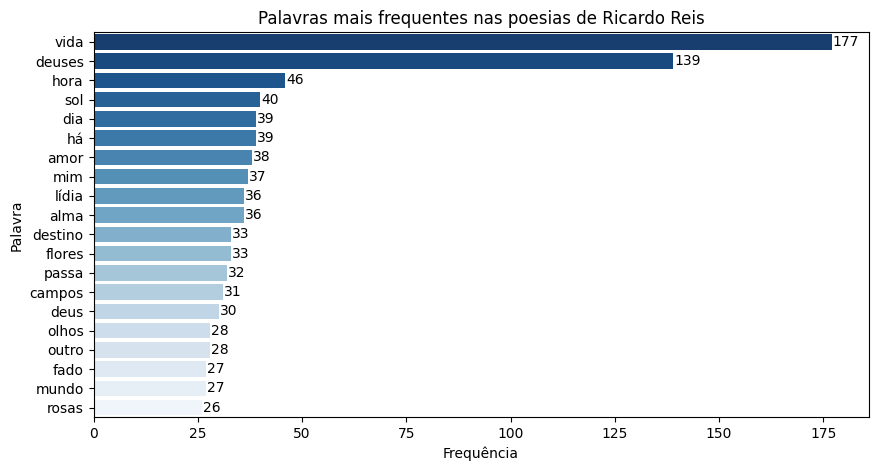

In [ ]:
from collections import Counter
import seaborn as sns

# Remover tokens inválidos (para evitar barras em branco)
tokens_filtrados_ricardo = [token for token in tokens_filtrados_ricardo if token.strip()]

# Contagem de palavras
frequencia = Counter(tokens_filtrados_ricardo)

# Cria dataframe para visualização
df_frequencia_ricardo = pd.DataFrame(frequencia.items(), columns=["Palavra", "Frequência"]).sort_values(by="Frequência", ascending=False).head(20)

# Plota gráfico de barras
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Frequência", y="Palavra", data=df_frequencia_ricardo, palette="Blues_r")
plt.xlabel("Frequência")
plt.ylabel("Palavra")
plt.title("Palavras mais frequentes nas poesias de Ricardo Reis")

# Adiciona a quantidade de palavras na frente das barras (curiosidade)
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width() + 0.2, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black')

plt.show()

# Análise Sintática e Estilística
* Atividade:
    * Aplicar POS-Tagging (Etiquetagem Gramatical).
    * Comparar a estrutura gramatical das poesias.
    * Criar um histograma da frequência de diferentes classes gramaticais.

<ipython-input-17-c2209af2c9ee>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequência", y="POS", data=df_pos_ricardo, palette="Purples_r")


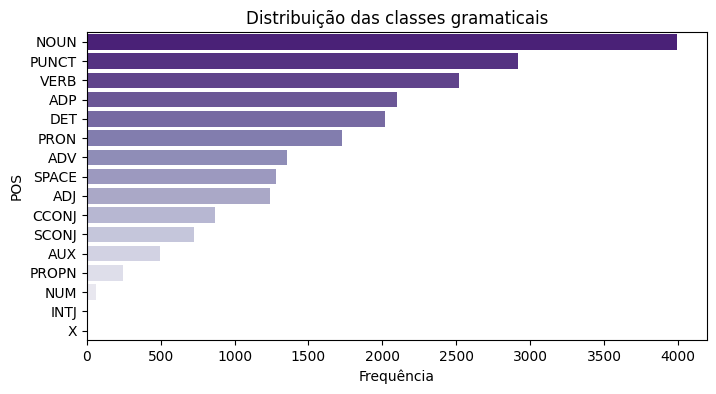

In [ ]:
# Contagem de classes gramaticais
pos_tags_ricardo = [token.pos_ for token in doc_ricardo]
contagem_pos_ricardo = Counter(pos_tags_ricardo)

# Criar DataFrame para visualização
df_pos_ricardo = pd.DataFrame(contagem_pos_ricardo.items(), columns=["POS", "Frequência"]).sort_values(by="Frequência", ascending=False)

# Plotar gráfico de barras
plt.figure(figsize=(8,4))
sns.barplot(x="Frequência", y="POS", data=df_pos_ricardo, palette="Purples_r")
plt.xlabel("Frequência")
plt.ylabel("POS")
plt.title("Distribuição das classes gramaticais")
plt.show()

# Modelagem de Estilo e Semântica
* Atividade:
    * Calcular a riqueza lexical das poesias.
    * Aplicar TF-IDF para destacar palavras mais importantes.
    * Criar embeddings de palavras para comparação semântica.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Concatenar tokens filtrados em uma única string
texto_filtrado_ricardo = " ".join(tokens_filtrados_ricardo)

# Criar um vetor TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([texto_filtrado_ricardo])

# Mostrar palavras mais importantes (com os scores TF-IDF)
print(pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()))

      abafo  abandonado  abandonados  abandonemos  abandono    abdica  \
0  0.002983    0.005966     0.002983     0.002983  0.002983  0.011932   

   abdiquemos    abeiro    abelha    aberto  ...   ínscios    íntimo  \
0    0.002983  0.002983  0.002983  0.002983  ...  0.002983  0.011932   

      ínvio     óbolo      ódio     ódios    órbita     única     único  \
0  0.002983  0.011932  0.005966  0.002983  0.002983  0.005966  0.014916   

       útil  
0  0.002983  

[1 rows x 3235 columns]


In [ ]:
# Criar um vetor TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([texto_filtrado_ricardo])

# Criar o DataFrame com as palavras e seus valores TF-IDF
df_tfidf_ricardo = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Ordenar os valores de TF-IDF
df_ricardo_head = df_tfidf_ricardo.T.sort_values(by=0, ascending=False).head(10)
df_ricardo_tail = df_tfidf_ricardo.T.sort_values(by=0, ascending=False).tail(10)

# Exibir as 10 palavras mais importantes
print(df_ricardo_head)
print()
print(df_ricardo_tail)

               0
vida    0.528013
deuses  0.414654
hora    0.137224
me      0.131257
sol     0.119325
dia     0.116342
há      0.116342
amor    0.113359
mim     0.110375
alma    0.107392

                   0
fingimento  0.002983
fingis      0.002983
finjo       0.002983
fins        0.002983
fiquei      0.002983
fiquemos    0.002983
fira        0.002983
firmemente  0.002983
fitando     0.002983
útil        0.002983


In [ ]:
# Usando NLTK e removendo stopwords
import nltk

# Baixar o conjunto de stopwords do NLTK
nltk.download('stopwords')

from nltk.corpus import stopwords

# Obter as stopwords em português do NLTK
stopwords_pt_nltk = stopwords.words('portuguese')

# Criar um vetor TF-IDF para o corpus filtrado, removendo stopwords em português
vectorizer = TfidfVectorizer(stop_words=stopwords_pt_nltk)
X = vectorizer.fit_transform(df_ricardo['Texto'])

# Obter o array de TF-IDF
tfidf_array = X.toarray()

# Criar um dataframe com os valores de TF-IDF, usando as palavras como colunas
tfidf_df = pd.DataFrame(tfidf_array, columns=vectorizer.get_feature_names_out())

# Calcular a média de TF-IDF por palavra
mean_tfidf = tfidf_df.mean(axis=0)

# Ordena as palavras com base no valor médio de TF-IDF (da maior para a menor relevância)
sorted_mean_tfidf = mean_tfidf.sort_values(ascending=False)

# Mostrar as palavras mais relevantes e menos relevantes (de acordo com valor TF-IDF)
print(sorted_mean_tfidf.head(10))
print()
print(sorted_mean_tfidf.tail(10))

vida      0.037860
deuses    0.034377
nada      0.028475
porque    0.021066
tudo      0.019957
hora      0.017862
mim       0.017392
amor      0.017282
sol       0.016036
dia       0.015884
dtype: float64

ardia         0.000191
ardiam        0.000191
arranquem     0.000191
imitemos      0.000191
movido        0.000191
esperava      0.000191
jogar         0.000191
importe       0.000191
deva          0.000191
refrescava    0.000191
dtype: float64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Comparação com Fernando Pessoa
* Atividade:
    * Comparar a escrita de Ricardo Reis com a Fernando Pessoa.
    * Gerar um modelo de similaridade textual para encontrar diferenças estilísticas.
    * Criar um classificador para tentar identificar quem escreveu um poema com base nas características do texto.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Carregar .csv
corpus_path_ricardo = "/content/drive/My Drive/trabalho_PLN/textos/autores/ricardo_reis.csv"
corpus_path_fernando = "/content/drive/My Drive/trabalho_PLN/textos/autores/fernando_pessoa.csv"

# Carregar os textos
with open(corpus_path_ricardo, 'r', encoding='utf-8') as file:
    ricardo_text = file.read()

with open(corpus_path_fernando, 'r', encoding='utf-8') as file:
    fernando_text = file.read()

# Criar o vetor de características com TfidfVectorizer
vectorizer = TfidfVectorizer()

# Transformar os textos em vetores de características
X = vectorizer.fit_transform([ricardo_text, fernando_text])

# Comparar semelhança entre Ricardo Reis e Fernando Pessoa
sim = cosine_similarity(X[0], X[1])
print(f"Similaridade entre Ricardo Reis e Fernando Pessoa: {sim[0][0]:.2f}")

Similaridade entre Ricardo Reis e Fernando Pessoa: 0.76


#ÁLVARO DE CAMPOS

# Preparação do Corpus e Pré-Processamento
* Atividade:

    * Carregar o corpus de poesias de Álvaro de Campos.
    * Realizar tokenização de sentenças e palavras.
    * Remover stopwords e pontuação para facilitar a análise.
    * Criar uma nuvem de palavras (WordCloud) para visualizar termos mais frequentes.

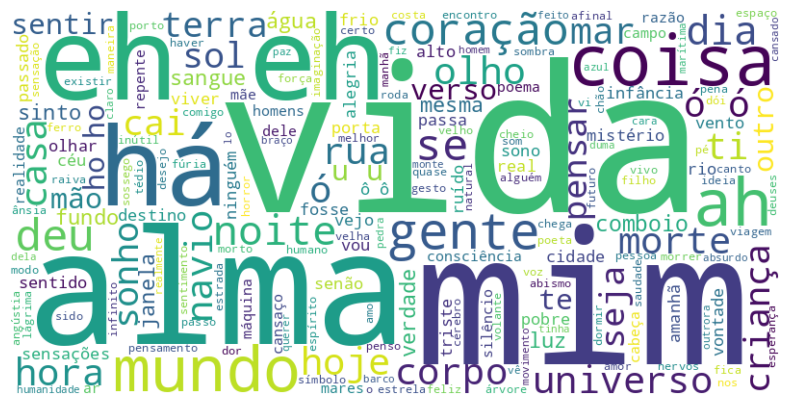

In [ ]:
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Carregar o modelo de português do spaCy
nlp_alvaro = spacy.load("pt_core_news_sm")

# Caminho para o arquivo CSV
corpus_path_alvaro = "/content/drive/My Drive/trabalho_PLN/textos/autores/alvaro_de_campos.csv"

# Carregar o arquivo CSV com pandas
df_alvaro = pd.read_csv(corpus_path_alvaro)

# Concatena coluna Texto
corpus_alvaro = " ".join(df_alvaro["Texto"].dropna())

# Processar o texto
doc_alvaro = nlp_alvaro(corpus_alvaro)

# Filtrar palavras sem stopwords e pontuação
tokens_filtrados_alvaro = [token.text.lower() for token in doc_alvaro if not token.is_stop and not token.is_punct]

# Criar a nuvem de palavras
wordcloud_alvaro = WordCloud(width=800, height=400, background_color="white").generate(" ".join(tokens_filtrados_alvaro))

# Mostrar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_alvaro, interpolation="bilinear")
plt.axis("off")
plt.show()

# Análise Estatística de Vocabulário
* Atividade:
    * Contar frequência de palavras e identificar os termos mais recorrentes.
    * Comparar o uso de substantivos, verbos e adjetivos na obra.
    * Criar um gráfico de distribuição de palavras.

<ipython-input-23-dc5bf9c365f7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Frequência", y="Palavra", data=df_frequencia_alvaro, palette="Blues_r")


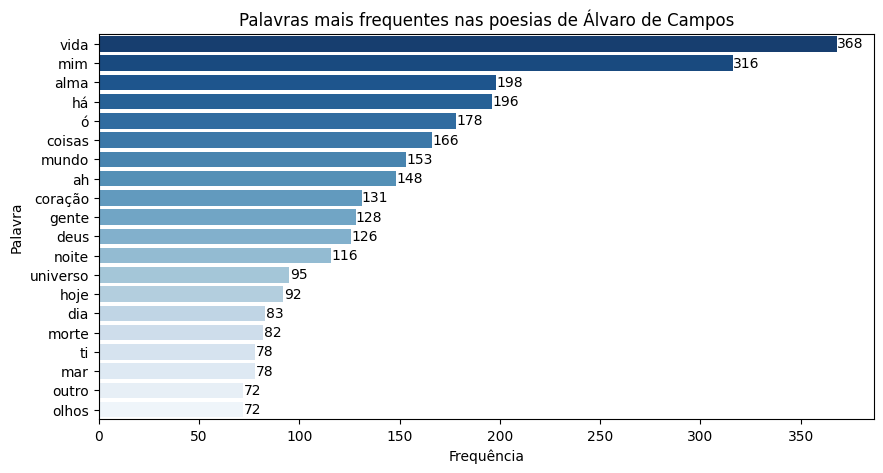

In [ ]:
from collections import Counter
import seaborn as sns

# Remover tokens inválidos (para evitar barras em branco)
tokens_filtrados_alvaro = [token for token in tokens_filtrados_alvaro if token.strip()]

# Contagem de palavras
frequencia = Counter(tokens_filtrados_alvaro)

# Cria dataframe para visualização
df_frequencia_alvaro = pd.DataFrame(frequencia.items(), columns=["Palavra", "Frequência"]).sort_values(by="Frequência", ascending=False).head(20)

# Plota gráfico de barras
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Frequência", y="Palavra", data=df_frequencia_alvaro, palette="Blues_r")
plt.xlabel("Frequência")
plt.ylabel("Palavra")
plt.title("Palavras mais frequentes nas poesias de Álvaro de Campos")

# Adiciona a quantidade de palavras na frente das barras (curiosidade)
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width() + 0.2, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black')

plt.show()

# Análise Sintática e Estilística
* Atividade:
    * Aplicar POS-Tagging (Etiquetagem Gramatical).
    * Comparar a estrutura gramatical das poesias.
    * Criar um histograma da frequência de diferentes classes gramaticais.

<ipython-input-24-a01c062564ed>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequência", y="POS", data=df_pos_alvaro, palette="Purples_r")


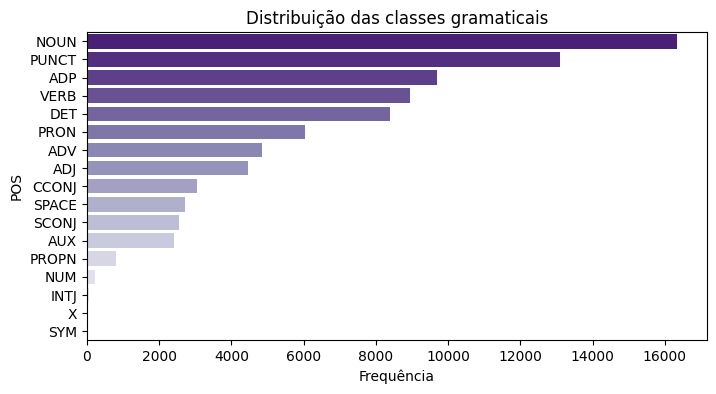

In [ ]:
# Contagem de classes gramaticais
pos_tags_alvaro = [token.pos_ for token in doc_alvaro]
contagem_pos_alvaro = Counter(pos_tags_alvaro)

# Criar DataFrame para visualização
df_pos_alvaro = pd.DataFrame(contagem_pos_alvaro.items(), columns=["POS", "Frequência"]).sort_values(by="Frequência", ascending=False)

# Plotar gráfico de barras
plt.figure(figsize=(8,4))
sns.barplot(x="Frequência", y="POS", data=df_pos_alvaro, palette="Purples_r")
plt.xlabel("Frequência")
plt.ylabel("POS")
plt.title("Distribuição das classes gramaticais")
plt.show()

# Modelagem de Estilo e Semântica
* Atividade:
    * Calcular a riqueza lexical das poesias.
    * Aplicar TF-IDF para destacar palavras mais importantes.
    * Criar embeddings de palavras para comparação semântica.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Concatenar tokens filtrados em uma única string
texto_filtrado_alvaro = " ".join(tokens_filtrados_alvaro)

# Criar um vetor TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([texto_filtrado_alvaro])

# Mostrar palavras mais importantes (com os scores TF-IDF)
print(pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()))

       1913      1914      1915      1923      1926        1ª        20  \
0  0.002811  0.000937  0.000937  0.000937  0.000937  0.000937  0.000937   

         2ª        32        40  ...        ôn        ôô   última    último  \
0  0.000937  0.000937  0.001874  ...  0.012181  0.000937  0.00937  0.000937   

    últimos     única     único     úteis      útil     útile  
0  0.002811  0.005622  0.005622  0.003748  0.005622  0.000937  

[1 rows x 9105 columns]


In [ ]:
# Criar um vetor TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([texto_filtrado_alvaro])

# Criar o DataFrame com as palavras e seus valores TF-IDF
df_tfidf_alvaro = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Ordenar os valores de TF-IDF
df_alvaro_head = df_tfidf_alvaro.T.sort_values(by=0, ascending=False).head(10)
df_alvaro_tail = df_tfidf_alvaro.T.sort_values(by=0, ascending=False).tail(10)

# Exibir as 10 palavras mais importantes
print(df_alvaro_head)
print()
print(df_alvaro_tail)

               0
me      0.362608
vida    0.349491
mim     0.298894
eh      0.244550
há      0.196764
alma    0.195827
coisas  0.159285
mundo   0.145231
ah      0.141483
se      0.127428

                     0
celebrando    0.000937
celebridades  0.000937
insónias      0.000937
celimène      0.000937
insípida      0.000937
insuportável  0.000937
insulto       0.000937
insubjectiva  0.000937
instável      0.000937
útile         0.000937


In [ ]:
# Usando NLTK e removendo stopwords
import nltk

# Baixar o conjunto de stopwords do NLTK
nltk.download('stopwords')

from nltk.corpus import stopwords

# Obter as stopwords em português do NLTK
stopwords_pt_nltk = stopwords.words('portuguese')

# Criar um vetor TF-IDF para o corpus filtrado, removendo stopwords em português
vectorizer = TfidfVectorizer(stop_words=stopwords_pt_nltk)
X = vectorizer.fit_transform(df_alvaro['Texto'])

# Obter o array de TF-IDF
tfidf_array = X.toarray()

# Criar um dataframe com os valores de TF-IDF, usando as palavras como colunas
tfidf_df = pd.DataFrame(tfidf_array, columns=vectorizer.get_feature_names_out())

# Calcular a média de TF-IDF por palavra
mean_tfidf = tfidf_df.mean(axis=0)

# Ordena as palavras com base no valor médio de TF-IDF (da maior para a menor relevância)
sorted_mean_tfidf = mean_tfidf.sort_values(ascending=False)

# Mostrar as palavras mais relevantes e menos relevantes (de acordo com valor TF-IDF)
print(sorted_mean_tfidf.head(10))
print()
print(sorted_mean_tfidf.tail(10))

tudo      0.035925
vida      0.030805
mim       0.024706
nada      0.023433
todos     0.022899
ter       0.021312
onde      0.019235
alma      0.019227
todas     0.018971
porque    0.018952
dtype: float64

cascos         0.000013
apopléctica    0.000013
mateis         0.000013
matastes       0.000013
gozarão        0.000013
companhias     0.000013
saudosa        0.000013
grata          0.000013
embarquem      0.000013
cumpridora     0.000013
dtype: float64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Comparação com Fernando Pessoa
* Atividade:
    * Comparar a escrita de Álvaro de Campos com a Fernando Pessoa.
    * Gerar um modelo de similaridade textual para encontrar diferenças estilísticas.
    * Criar um classificador para tentar identificar quem escreveu um poema com base nas características do texto.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Carregar .csv
corpus_path_alvaro = "/content/drive/My Drive/trabalho_PLN/textos/autores/alvaro_de_campos.csv"
corpus_path_fernando = "/content/drive/My Drive/trabalho_PLN/textos/autores/fernando_pessoa.csv"

# Carregar os textos
with open(corpus_path_alvaro, 'r', encoding='utf-8') as file:
    alvaro_text = file.read()

with open(corpus_path_fernando, 'r', encoding='utf-8') as file:
    fernando_text = file.read()

# Criar o vetor de características com TfidfVectorizer
vectorizer = TfidfVectorizer()

# Transformar os textos em vetores de características
X = vectorizer.fit_transform([alvaro_text, fernando_text])

# Comparar semelhança entre Álvaro de Campos e Fernando Pessoa
sim = cosine_similarity(X[0], X[1])
print(f"Similaridade entre Álvaro de Campos e Fernando Pessoa: {sim[0][0]:.2f}")

Similaridade entre Álvaro de Campos e Fernando Pessoa: 0.83


#FERNANDO PESSOA

# Preparação do Corpus e Pré-Processamento
* Atividade:

    * Carregar o corpus de poesias de Fernando Pessoa.
    * Realizar tokenização de sentenças e palavras.
    * Remover stopwords e pontuação para facilitar a análise.
    * Criar uma nuvem de palavras (WordCloud) para visualizar termos mais frequentes.

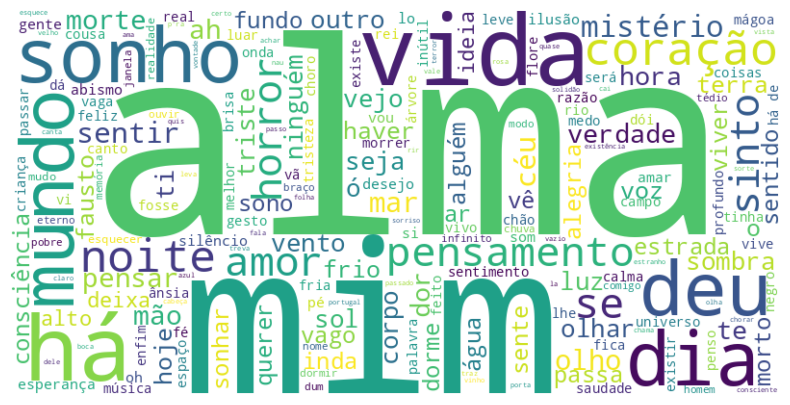

In [ ]:
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Carregar o modelo de português do spaCy
nlp_fernando = spacy.load("pt_core_news_sm")

# Caminho para o arquivo CSV
corpus_path_fernando = "/content/drive/My Drive/trabalho_PLN/textos/autores/fernando_pessoa.csv"

# Carregar o arquivo CSV com pandas
df_fernando = pd.read_csv(corpus_path_fernando)

# Concatena coluna Texto
corpus_fernando = " ".join(df_fernando["Texto"].dropna())

# Processar o texto
doc_fernando = nlp_fernando(corpus_fernando)

# Filtrar palavras sem stopwords e pontuação
tokens_filtrados_fernando = [token.text.lower() for token in doc_fernando if not token.is_stop and not token.is_punct]

# Criar a nuvem de palavras
wordcloud_alvaro = WordCloud(width=800, height=400, background_color="white").generate(" ".join(tokens_filtrados_fernando))

# Mostrar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_alvaro, interpolation="bilinear")
plt.axis("off")
plt.show()

# Análise Estatística de Vocabulário
* Atividade:
    * Contar frequência de palavras e identificar os termos mais recorrentes.
    * Comparar o uso de substantivos, verbos e adjetivos na obra.
    * Criar um gráfico de distribuição de palavras.

<ipython-input-30-692ba0b93603>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Frequência", y="Palavra", data=df_frequencia_fernando, palette="Blues_r")


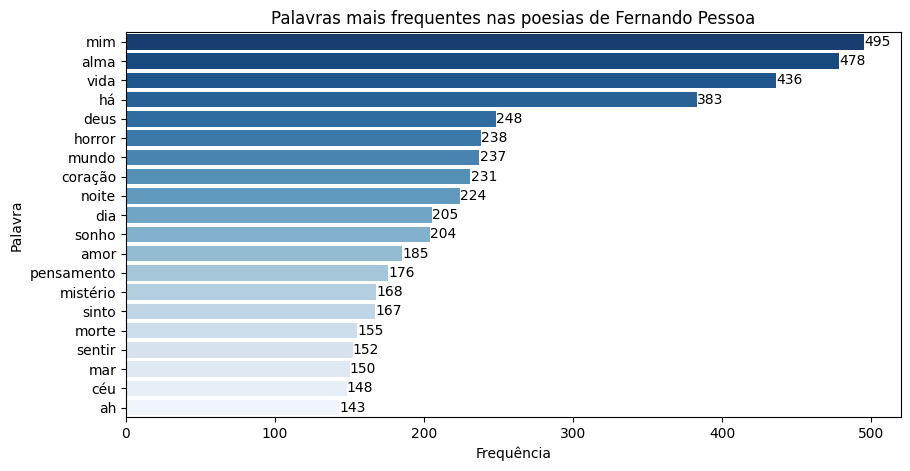

In [ ]:
from collections import Counter
import seaborn as sns

# Remover tokens inválidos (para evitar barras em branco)
tokens_filtrados_fernando = [token for token in tokens_filtrados_fernando if token.strip()]

# Contagem de palavras
frequencia = Counter(tokens_filtrados_fernando)

# Cria dataframe para visualização
df_frequencia_fernando = pd.DataFrame(frequencia.items(), columns=["Palavra", "Frequência"]).sort_values(by="Frequência", ascending=False).head(20)

# Plota gráfico de barras
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Frequência", y="Palavra", data=df_frequencia_fernando, palette="Blues_r")
plt.xlabel("Frequência")
plt.ylabel("Palavra")
plt.title("Palavras mais frequentes nas poesias de Fernando Pessoa")

# Adiciona a quantidade de palavras na frente das barras (curiosidade)
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width() + 0.2, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black')

plt.show()

# Análise Sintática e Estilística
* Atividade:
    * Aplicar POS-Tagging (Etiquetagem Gramatical).
    * Comparar a estrutura gramatical das poesias.
    * Criar um histograma da frequência de diferentes classes gramaticais.

<ipython-input-31-40a0637027dc>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequência", y="POS", data=df_pos_fernando, palette="Purples_r")


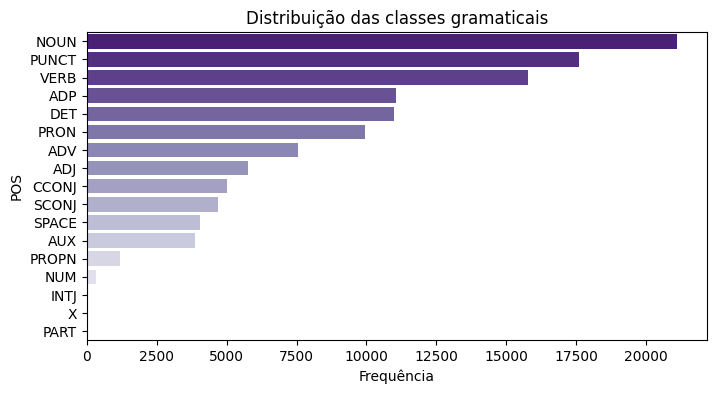

In [ ]:
# Contagem de classes gramaticais
pos_tags_fernando = [token.pos_ for token in doc_fernando]
contagem_pos_fernando = Counter(pos_tags_fernando)

# Criar DataFrame para visualização
df_pos_fernando = pd.DataFrame(contagem_pos_fernando.items(), columns=["POS", "Frequência"]).sort_values(by="Frequência", ascending=False)

# Plotar gráfico de barras
plt.figure(figsize=(8,4))
sns.barplot(x="Frequência", y="POS", data=df_pos_fernando, palette="Purples_r")
plt.xlabel("Frequência")
plt.ylabel("POS")
plt.title("Distribuição das classes gramaticais")
plt.show()

# Modelagem de Estilo e Semântica
* Atividade:
    * Calcular a riqueza lexical das poesias.
    * Aplicar TF-IDF para destacar palavras mais importantes.
    * Criar embeddings de palavras para comparação semântica.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Concatenar tokens filtrados em uma única string
texto_filtrado_fernando = " ".join(tokens_filtrados_fernando)

# Criar um vetor TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([texto_filtrado_fernando])

# Mostrar palavras mais importantes (com os scores TF-IDF)
print(pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()))

    abafado     abafe    abaixo     abalo    abanar  abandona  abandonada  \
0  0.000602  0.000602  0.003611  0.000602  0.001805  0.001805    0.001805   

   abandonadas  abandonado  abandonar  ...    órbita     órfão   última  \
0     0.001204    0.003009   0.003009  ...  0.000602  0.000602  0.01023   

    últimas     única    únicas     único    únicos     úteis      útil  
0  0.000602  0.008425  0.000602  0.009629  0.000602  0.000602  0.001805  

[1 rows x 9290 columns]


In [ ]:
# Criar um vetor TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([texto_filtrado_fernando])

# Criar o DataFrame com as palavras e seus valores TF-IDF
df_tfidf_fernando = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Ordenar os valores de TF-IDF
df_fernando_head = df_tfidf_fernando.T.sort_values(by=0, ascending=False).head(10)
df_fernando_tail = df_tfidf_fernando.T.sort_values(by=0, ascending=False).tail(10)

# Exibir as 10 palavras mais importantes
print(df_fernando_head)
print()
print(df_fernando_tail)

                0
alma     0.318342
me       0.317741
mim      0.298484
vida     0.262978
há       0.257562
deus     0.151649
horror   0.143826
mundo    0.142622
coração  0.139012
noite    0.134799

                 0
cobri     0.000602
cobiça    0.000602
jaula     0.000602
jaspe     0.000602
jarro     0.000602
cobiçou   0.000602
jarras    0.000602
cobras    0.000602
japonesa  0.000602
abafado   0.000602


In [ ]:
# Usando NLTK e removendo stopwords
import nltk

# Baixar o conjunto de stopwords do NLTK
nltk.download('stopwords')

from nltk.corpus import stopwords

# Obter as stopwords em português do NLTK
stopwords_pt_nltk = stopwords.words('portuguese')

# Criar um vetor TF-IDF para o corpus filtrado, removendo stopwords em português
vectorizer = TfidfVectorizer(stop_words=stopwords_pt_nltk)
X = vectorizer.fit_transform(df_fernando['Texto'])

# Obter o array de TF-IDF
tfidf_array = X.toarray()

# Criar um dataframe com os valores de TF-IDF, usando as palavras como colunas
tfidf_df = pd.DataFrame(tfidf_array, columns=vectorizer.get_feature_names_out())

# Calcular a média de TF-IDF por palavra
mean_tfidf = tfidf_df.mean(axis=0)

# Ordena as palavras com base no valor médio de TF-IDF (da maior para a menor relevância)
sorted_mean_tfidf = mean_tfidf.sort_values(ascending=False)

# Mostrar as palavras mais relevantes e menos relevantes (de acordo com valor TF-IDF)
print(sorted_mean_tfidf.head(10))
print()
print(sorted_mean_tfidf.tail(10))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


mim        0.023331
alma       0.022267
tudo       0.021484
nada       0.021259
sei        0.021232
vida       0.020678
onde       0.016808
coração    0.016130
porque     0.015242
ter        0.014979
dtype: float64

licores        0.000019
alteração      0.000019
entrou         0.000019
transmutada    0.000019
excitar        0.000019
fizeras        0.000019
arranjar       0.000019
remorso        0.000019
debilidade     0.000019
secreta        0.000019
dtype: float64


# Comparação com Manuel Bandeira
* Atividade:
    * Comparar a escrita de Álvaro de Campos com a um poema do Manuel Bandeira.
    * Gerar um modelo de similaridade textual para encontrar diferenças estilísticas.
    * Criar um classificador para tentar identificar quem escreveu um poema com base nas características do texto.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Carregar .csv
corpus_path_fernando = "/content/drive/My Drive/trabalho_PLN/textos/autores/fernando_pessoa.csv"
corpus_manuel = "vou-me embora para pasárgada, lá sou amigo do rei, lá tenho a mulher que eu quero, na cama que escolherei. vou-me embora para pasárgada, aqui eu não sou feliz, lá a existência é uma aventura, de tal modo inconsequente, que joana a louca de espanha, rainha e falsa demente, vem a ser contraparente, da nora que nunca tive. e como farei ginástica, andarei de bicicleta, montarei em burro brabo, subirei no pau-de-sebo, tomarei banhos de mar! e quando estiver cansado, deito na beira do rio, mando chamar a mãe-d’água, para me contar as histórias, que no tempo de eu menino, rosa vinha me contar. vou-me embora para pasárgada, em pasárgada tem tudo, é outra civilização, tem um processo seguro, de impedir a concepção, tem telefone automático, tem alcaloide à vontade, tem prostitutas bonitas, para a gente namorar. e quando eu estiver mais triste, mas triste de não ter jeito, quando de noite me der, vontade de me matar, — lá sou amigo do rei —, terei a mulher que eu quero, na cama que escolherei, vou-me embora para pasárgada."

with open(corpus_path_fernando, 'r', encoding='utf-8') as file:
    fernando_text = file.read()

# Criar o vetor de características com TfidfVectorizer
vectorizer = TfidfVectorizer()

# Transformar os textos em vetores de características
X = vectorizer.fit_transform([fernando_text, corpus_manuel])

# Comparar semelhança entre Fernando Pessoa e Manuel Bandeira
sim = cosine_similarity(X[0], X[1])
print(f"Similaridade entre Fernando Pessoa e Manuel Bandeira: {sim[0][0]:.2f}")

Similaridade entre Fernando Pessoa e Manuel Bandeira: 0.44


#IDENTIFICADOR DE AUTORIA

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Carregar o dataset
df = pd.read_csv('/content/drive/My Drive/trabalho_PLN/textos/arquivopessoa_textos_poemas_limpo_poesia.csv')

# Preparar os dados
textos = df['Texto']
autores = df['Autor']

# Codificar os autores (rótulos) como números
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(autores)

# Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(textos, y, test_size=0.2, random_state=42) # Usou 20% dos poemas totais para teste

# Configura stopwords
stop_words = set(stopwords.words('portuguese'))

# Função de pré-processamento
def preprocess_text(texto):
    tokens = word_tokenize(str(texto).lower())  # Normaliza
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]  # Remove stopwords e pontuação
    return ' '.join(tokens)

# Aplica pré-processamento
X_train_proc = X_train.apply(preprocess_text)
X_test_proc = X_test.apply(preprocess_text)

# Cria TF-IDF aprimorado
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000, min_df=2)
X_train_tfidf = vectorizer.fit_transform(X_train_proc)
X_test_tfidf = vectorizer.transform(X_test_proc)

# Definir modelo de rede neural com mais camadas e unidades
model = Sequential()

# Camada de entrada
model.add(Dense(1024, input_dim=X_train_tfidf.shape[1], activation='relu'))
model.add(Dropout(0.3))

# Camada oculta adicional
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))

# Camada de saída
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compilação do modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Usar early stopping para evitar overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Treinamento do modelo com mais épocas
model.fit(X_train_tfidf, y_train, epochs=20, batch_size=64, validation_data=(X_test_tfidf, y_test), callbacks=[early_stopping])

# Acurácia
loss, accuracy = model.evaluate(X_test_tfidf, y_test)
print(f'Acurácia: {accuracy:.2f}')

# Previsões para cálculo de outras métricas
y_pred = model.predict(X_test_tfidf)
y_pred_classes = y_pred.argmax(axis=1)

# Calcular outras métricas
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Exibir as métricas
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print('Matriz de Confusão:')
print(conf_matrix)

# Função para prever autoria de um novo poema
def identificar_autoria(texto_novo):
    texto_proc = preprocess_text(texto_novo)
    texto_tfidf = vectorizer.transform([texto_proc])
    probabilidades = model.predict(texto_tfidf).max(axis=1)

    if probabilidades < 0.8: # Se a predição do model.predict for menor que 0.9 ele retorna como autor desconhecido
        return "Desconhecido"
    else:
        autor_predito = label_encoder.inverse_transform(model.predict(texto_tfidf).argmax(axis=1))[0]
        return autor_predito

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.5759 - loss: 1.1652 - val_accuracy: 0.6063 - val_loss: 0.9207
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - accuracy: 0.6348 - loss: 0.7205 - val_accuracy: 0.7192 - val_loss: 0.6967
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.9068 - loss: 0.3288 - val_accuracy: 0.7953 - val_loss: 0.5562
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.9562 - loss: 0.1128 - val_accuracy: 0.8136 - val_loss: 0.6004
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - accuracy: 0.9984 - loss: 0.0335 - val_accuracy: 0.8084 - val_loss: 0.6609
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.9999 - loss: 0.0063 - val_accuracy: 0.8163 - val_loss: 0.6148
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8020 - loss: 0.5231
Acurácia: 0.80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Precisão: 0.74
Recall: 0.80
F1-Score: 0.76
Matriz de Confusão:
[[  0  10   7  10]
 [  0 216   4  11]
 [

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Obter os nomes dos autores
autores = label_encoder.classes_

# Exibir os nomes dos autores correspondentes a cada linha/coluna da matriz de confusão
print("Autores e suas respectivas linhas/colunas na matriz de confusão:")
for i, autor in enumerate(autores):
    print(f"{i}: {autor}")

Autores e suas respectivas linhas/colunas na matriz de confusão:
0: alberto caeiro
1: fernando pessoa
2: ricardo reis
3: álvaro de campos


In [ ]:
# Input (certo)
texto_novo = "bicarbonato de soda  súbita, uma angústia...  ah, que angústia, que náusea do estômago à alma!  que amigos que tenho tido!  que vazias de tudo as cidades que tenho percorrido!  que esterco metafísico os meus propósitos todos!  uma angústia,  uma desconsolação da epiderme da alma,  um deixar cair os braços ao sol-pôr do esforço...  renego.  renego tudo.  renego mais do que tudo.  renego a gládio e fim todos os deuses e a negação deles.  mas o que é que me falta, que o sinto faltar-me no estômago e na circulação do sangue?  que atordoamento vazio me esfalfa no cérebro?  devo tomar qualquer coisa ou suicidar-me? não: vou existir. arre! vou existir. e-xis-tir... e--xis--tir...  meu deus! que budismo me esfria no sangue!  renunciar de portas todas abertas,  perante a paisagem todas as paisagens,  sem esperança, em liberdade,  sem nexo,  acidente da inconsequência da superfície das coisas,  monótono mas dorminhoco,  e que brisas quando as portas e as janelas estão todas abertas!  que verão agradável dos outros!  dêem-me de beber, que não tenho sede!"
autor_predito = identificar_autoria(texto_novo)
print(f'Autor predito: {autor_predito}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
Autor predito: álvaro de campos


In [ ]:
# Input (certo)
texto_novo = 'Mis pies tocan tus pies y mi boca tus labios, has crecido, suben tus hombros como dos colinas, tus pechos se pasean por mi pecho, mi brazo alcanza apenas a rodear la delgada línea de luna nueva que tiene tu cintura: en el amor como agua de mar te has desatado: mido apenas los ojos más extensos del cielo y me inclino a tu boca para besar la tierra.'
autor_predito = identificar_autoria(texto_novo)
print(f'Autor predito: {autor_predito}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Autor predito: Desconhecido


In [ ]:
# Input (errado)
texto_novo = 'Quantas vezes como agora a reunião se estendeu até que chegou a aurora e nos surpreendeu. As estrelas testemunham nosso amor e semelhança. Boa noite, meus amigos. Boa noite, vizinhança. Prometemos despedirmos sem dizer "adeus" jamais, pois haveremos de nos reunirmos muitas vezes mais! Quantas vezes como agora a reunião se estendeu até que chegou a aurora e nos surpreendeu. As estrelas testemunham nosso amor e semelhança. Boa noite, meus amigos. Boa noite, vizinhança. Prometemos despedirmos sem dizer "adeus" jamais, pois haveremos de nos reunirmos muitas, muitas vezes mais!'
autor_predito = identificar_autoria(texto_novo)
print(f'Autor predito: {autor_predito}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
Autor predito: fernando pessoa


In [ ]:
# Input (certo)
texto_novo = 'Tinha 25 anos de amores e sonhos. Você era pra mim o meu Drops de anis, alecrim! Era meu rabo de saia, minha doce amada. Linda, linda, era tudo que eu queria. Rosa e jasmim. Mas o tempo foi passando. O tempo é louco, o tempo é todo tempo. O tempo come o tempo, chegamos ao fim. Te vi nos braços de um outro, revirei na cama. Passei a noite em claro. Mas no fim das contas, eu descobri. Moto-serra, moto-serra. Era a peça que faltava no meu quarto de dormir. Moto-serra, moto-serra. Hoje entendo porque tu olhavas tanto pro jardim. Fui serrando os seus pezinhos que eram para mim. A coisa mais bonita que eu nunca esqueci, prossegui! Serrei suas duas mãos que eram diamantes. E quando rezavam pareciam conchas de marfim. Serrei suas duas pernas, os seus dois bracinhos. Você ficou sendo a Vênus de Millus do meu jardim. Te serrei por dentro e fora, te serrei no meio. Restou um toquinho que eu serrei também. Serrei feliz. Moto-serra, moto-serra. Os pedaços manchados de sangue plantei no jardim. Moto-serra, moto-serra. Germinaram daqueles pedaços rosas e jasmins. Moto-serra, moto-serra. Os pedaços manchados de sangue plantei no jardim. Moto-serra, moto-serra.'
autor_predito = identificar_autoria(texto_novo)
print(f'Autor predito: {autor_predito}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Autor predito: Desconhecido


In [ ]:
# Input (errado)
texto_novo = 'Naquela noite, cheia de estrelas, ela passava cheia de graça. A segurei pelos cabelos e enfiei uma porrada. Ela gemia, ela chorava e a lua cheia iluminava. Depois peguei um caco de vidro e enterrei no seu umbigo. Ela urrava, ela gemia. Um passarinho batia as asas. Um violino tocava valsa e a lua cheia iluminava. Com um alicate eu retorcia os seus mamilos tão delicados. Ela pedia pra que eu parasse e eu sentia uma estranha calma. Os vaga-lumes contracenavam e a lua cheia iluminava. E fui puxando fio por fio dos seus cabelos castanho claros. Em cada fio que eu arrancava, era uma lágrima, era outra lágrima. Os arvoredos com cor de prata, a lua cheia iluminava. E com a perícia de um obstetra, em meio a um bosque cheio de flores, eu extirpei de dentro dela um bicho horrível chamado homem. Os passarinhos em revoada, a lua cheia iluminava. A minha vida é essa história. Por mais que eu pinte, é sempre escura. Pro que eu pergunto, não há resposta. Mas de repente levei um susto. Olhei pra dentro da minha alma e a lua cheia iluminava.'
autor_predito = identificar_autoria(texto_novo)
print(f'Autor predito: {autor_predito}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Autor predito: fernando pessoa
